In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('online_retail_scaled.csv',index_col=[0])

In [3]:
df

,freq,mv,rec
0,-0.557968,4.801379,-1.051407
1,-0.557968,4.121402,-1.069685
2,-0.557968,3.414454,-1.060546
3,-0.557968,4.189423,-1.051407
4,-0.557968,4.111352,-1.023990
...,...,...,...
6004,0.644971,-0.266264,-0.923461
6005,-0.317380,-0.423010,-0.493929
6006,-0.557968,-0.430408,1.617175
6007,-0.076793,0.151535,-0.064397


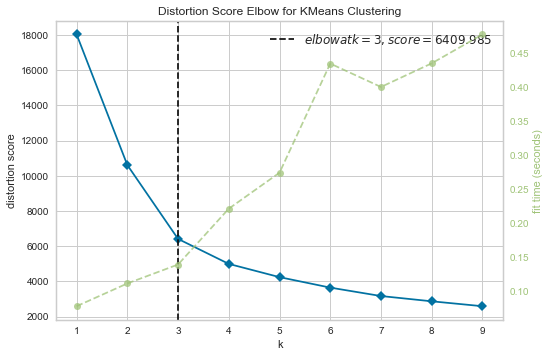

In [4]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(df)
visualizer.show()

Using the KElbowVisualizer, we can see that a k of 3 provides us with the best number of clusters within our data. What this means is that along our entire customer base, we can generalize three segments across recency, frequency, and monetary value. By digging deeper into how our data are clustered, we can start to understand these segments and begin to develop strategies for maximizing revenue from each.

In [5]:
model = KMeans(n_clusters=3)

In [6]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
pred = model.predict(df)

In [8]:
pred

array([2, 2, 2, ..., 1, 0, 0])

In [9]:
df['segment'] = pred

In [10]:
df

,freq,mv,rec,segment
0,-0.557968,4.801379,-1.051407,2
1,-0.557968,4.121402,-1.069685,2
2,-0.557968,3.414454,-1.060546,2
3,-0.557968,4.189423,-1.051407,2
4,-0.557968,4.111352,-1.023990,2
...,...,...,...,...
6004,0.644971,-0.266264,-0.923461,0
6005,-0.317380,-0.423010,-0.493929,0
6006,-0.557968,-0.430408,1.617175,1
6007,-0.076793,0.151535,-0.064397,0


ValueError: 'c' argument has 6009 elements, which is inconsistent with 'x' and 'y' with size 0.

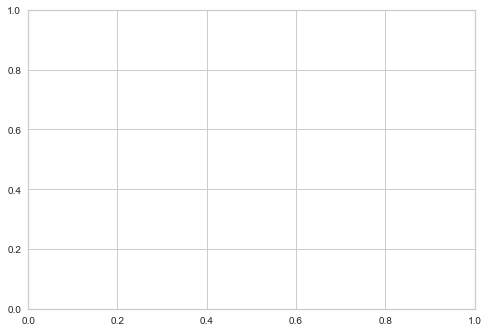

In [26]:
cmap = {0:'red',1:'blue',2:'green'}
sns.scatterplot(x=df['mv'],y=df['rec'],size=(df['mv']**2)*3,c=df['segment'],cmap='brg',legend=True)
plt.xlabel
plt.xlabel('Customer purchase recency')
plt.ylabel('Customer purchase frequency')
plt.title('Segmenting customer base by RFM')
plt.annotate('segment 0',(-0.16075769, -0.20955571))
plt.annotate('segment 1',(1.94108145,  2.00471976))
plt.annotate('segment 2',(-0.47695276, -0.41923554))


Text(0.5, 1.0, 'RMF Analysis of Customer Segments')

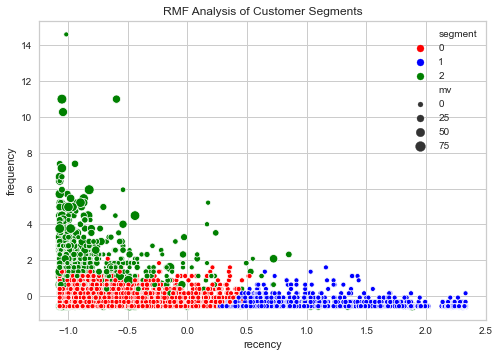

In [32]:
sns.scatterplot(data=df,x=df['rec'],y=df['freq'],size=(df['mv']**2)*3,hue='segment',palette=['red','blue','green'],legend='brief')
plt.xlabel('recency')
plt.ylabel('frequency')
plt.title('RMF Analysis of Customer Segments')

In [34]:
model.cluster_centers_
model.labels_


array([2, 2, 2, ..., 1, 0, 0])

Based on our segmentation and our visualization, we can start to draw some conclusions around the customer base.

First, it's important to describe the plot. 
* Each of our dimensions was scaled through a StandardScaler - essentially, what we are seeing is the z-score (or number of standard deviations from the mean) for each customer along these dimensions. This explains why we have negative values (i.e., those customers have a frequency or recency below the mean).
* The x-axis represents the recency of the purchase. This is calculated as the number of days between the most recent purchase and the end of the dataset (9/12/10). From our EDA, we know that the mean R is 116 days - so all the points to the left of the y-axis represent customers who have made purchases in the last ~4 months. 
* The y-axis represents the frequency of purchases. This is calculated as the number of purchases made by each customer over the time period covered by the dataset. From our EDA we know the mean frequency is roughly 4 purchases, so all datapoints below the x-axis represent infrequent customers.
* The size of each point represents the scaled monetary value of a customer, calculated as the total net revenue generated by each customer (purchases - returns). The monetary value has been scaled (squared and multiplied by 3) to account for negative MV (which indicates an MV below the mean) and for visibility.

Initial reactions:
* Based on the chart and the cluster centers listed above, we can generalize our three customer segments to:
    * Low-frequency, low-recency, low-MV customers - customers who have purchased recently, have a small number of overall purchases, and make relatively lower total purchases (indicated in red)
    * Low-frequency, high-recency, low-MV customers - customers who have not purchase recently with a small number of overall purchases, and with a low total purchase volume (indicated in blue)
    * High-frequency, low-recency, high-MV customers - customers who purchase relatively often and recently, and have a high purchase volume (indicated in green)
    
* Based on the recency graph, it does also seem like there has been an increase in number of purchases in the recent past. 

In [14]:
df.to_excel('labeled_data.xlsx')